In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [264]:
df = pd.read_csv(r'C:\Me\Python\Dataset\data\data.csv',index_col=0)
#df.head()

In [92]:
#df.columns

### 1. Dream Team

In [266]:
df1 = df[(df['Potential'] >= 89) & (df['International Reputation'] >= 3.0)][['Name','Age','Nationality','Position','Potential','Overall','International Reputation','Club']].sort_values(by=['Overall','Potential','International Reputation'],ascending=False).groupby('Position').head(2)
#df1

In [98]:
df_CB = df1[df1['Position'].isin(['CB'])]
df_CB

,Name,Age,Nationality,Position,Potential,Overall,International Reputation,Club
42,S. Umtiti,24,France,CB,92,87,3.0,FC Barcelona
12,D. Godín,32,Uruguay,CB,90,90,3.0,Atlético Madrid


In [267]:
#4-3-3
df2 = df1[df1['Position'].isin(['ST','LW','RW','RCM','LCM','CAM','LCB','RCB','GK'])]
my_dreamdf = df2.sort_values(by=['Overall','Potential','International Reputation'],ascending=False).groupby('Position').head(1)
my_dreamdf.append(df_CB)

,Name,Age,Nationality,Position,Potential,Overall,International Reputation,Club
1,Cristiano Ronaldo,33,Portugal,ST,94,94,5.0,Juventus
2,Neymar Jr,26,Brazil,LW,93,92,5.0,Paris Saint-Germain
3,De Gea,27,Spain,GK,93,91,4.0,Manchester United
4,K. De Bruyne,27,Belgium,RCM,92,91,4.0,Manchester City
8,Sergio Ramos,32,Spain,RCB,91,91,4.0,Real Madrid
11,T. Kroos,28,Germany,LCM,90,90,4.0,Real Madrid
17,A. Griezmann,27,France,CAM,90,89,4.0,Atlético Madrid
24,G. Chiellini,33,Italy,LCB,89,89,4.0,Juventus
60,R. Sterling,23,England,RW,89,86,3.0,Manchester City
42,S. Umtiti,24,France,CB,92,87,3.0,FC Barcelona


### 2. Analyse which Club or National Team has the best-rated players

In [284]:
#Best Club by Player count in TOP 50
def best_rated_players(arg):
    print(arg)
    df3 = df.sort_values(by=['Overall','Potential','International Reputation'], ascending=False).head(50)
    #print(df3)
    print(df3[arg].value_counts().head(1))

if __name__ == '__main__':
    best_rated_players('Club')


Club
Real Madrid    9
Name: Club, dtype: int64


In [272]:
#TOP 10 Clubs
top_rated_clubs = df.groupby('Club').agg({'Overall': 'mean'}).reset_index().sort_values(by='Overall',ascending=False).head(10)

#LAST 10 Clubs
lowest_rated_clubs = df.groupby('Club').agg({'Overall': 'mean'}).reset_index().sort_values(by='Overall').head(10)

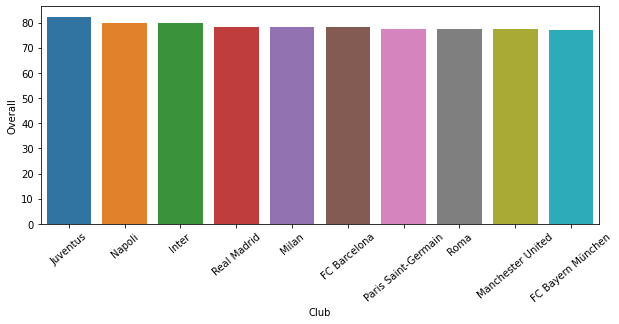

In [274]:
fig=plt.figure(figsize=(10,4))
plt.tick_params(axis='x',
               labelsize='medium',
               rotation=40)
sns.barplot(x="Club",y="Overall",data=top_rated_clubs)

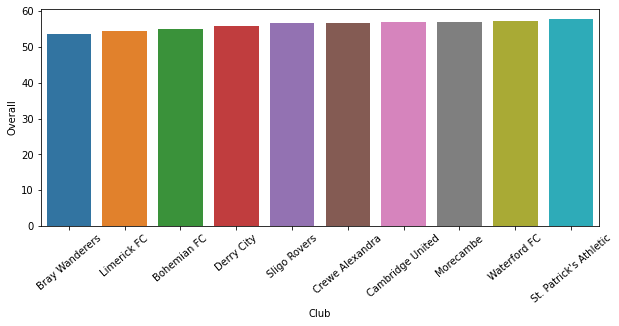

In [263]:
fig=plt.figure(figsize=(10,4))
plt.tick_params(axis='x',
               labelsize='medium',
               rotation=40)
sns.barplot(x="Club",y="Overall",data=lowest_rated_clubs)

### Assess the strength of a team at a particular position

### Analyse the team with the best dribbling speed

In [286]:
df4 = df.groupby('Club').agg({'Dribbling': 'mean'}).reset_index().sort_values(by='Dribbling', ascending=False).head(10)
df4

,Club,Dribbling
326,Juventus,69.520000
435,Paris Saint-Germain,68.833333
398,Napoli,68.640000
363,Liverpool,68.212121
86,Borussia Dortmund,68.151515
26,Ajax,67.900000
232,FC Porto,67.357143
382,Milan,67.222222
375,Manchester United,66.878788
374,Manchester City,66.151515


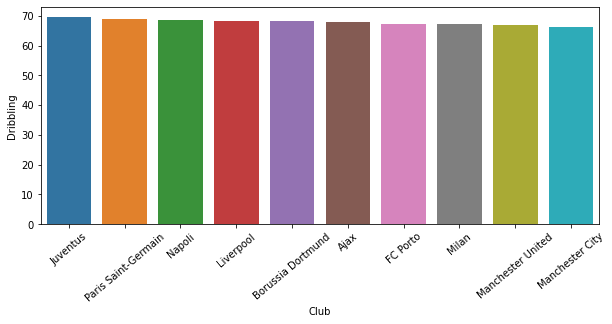

In [287]:
fig=plt.figure(figsize=(10,4))
plt.tick_params(axis='x',
               labelsize='medium',
               rotation=40)
sns.barplot(x="Club",y="Dribbling",data=df4)

### Co-relate between Age and Overall rating

In [309]:
import plotly.express as px

In [334]:
#!pip install --user --proxy=websurfing1-tin1.esi.adp.com:8080 seaborn==0.9.0

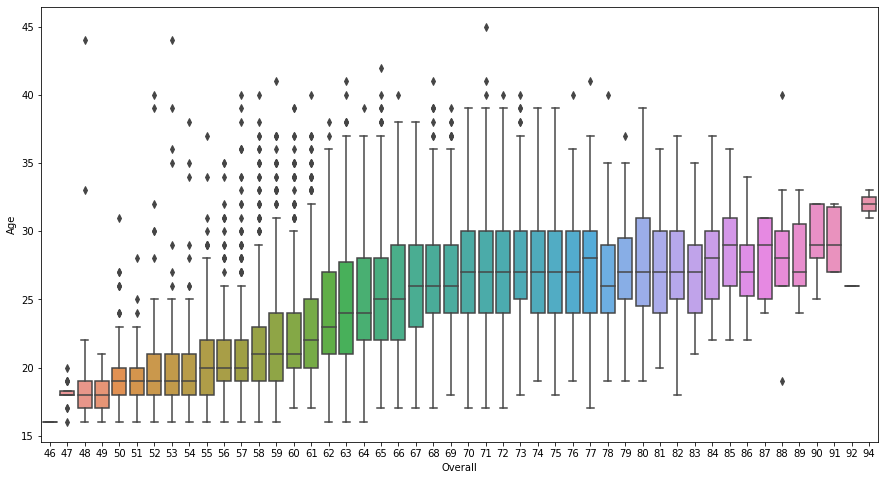

In [402]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Overall',y='Age',data=df)

In [399]:
#Check by mean
df5 = df[['Age','Overall']].groupby('Age')['Overall'].mean().reset_index()

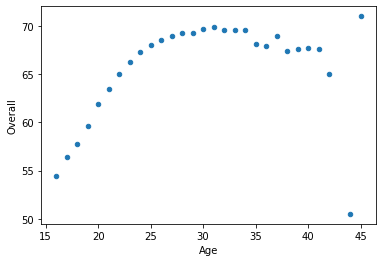

In [367]:
df5.plot.scatter(x='Age',y='Overall')

### Co-relate between Age and Nationality

In [426]:
#Young players
df_youngplayers = df[(df['Age'] >= 15) & (df['Age'] <= 25)]

In [377]:
df6 = df.groupby('Nationality')['Age'].mean().reset_index()
df6
#Oldest players
df6_old = df6.sort_values(by='Age',ascending=False).head(10)
#Youngest players
df6_young = df6.sort_values(by='Age').head(10)
df6_old

,Nationality,Age
116,Oman,36.00
124,Puerto Rico,34.00
50,Ethiopia,32.00
151,Trinidad & Tobago,31.75
88,Kuwait,31.00
147,São Tomé & Príncipe,31.00
117,Palestine,31.00
63,Guam,30.00
109,New Caledonia,30.00
53,Fiji,30.00


### Co-relate between Age and Potential

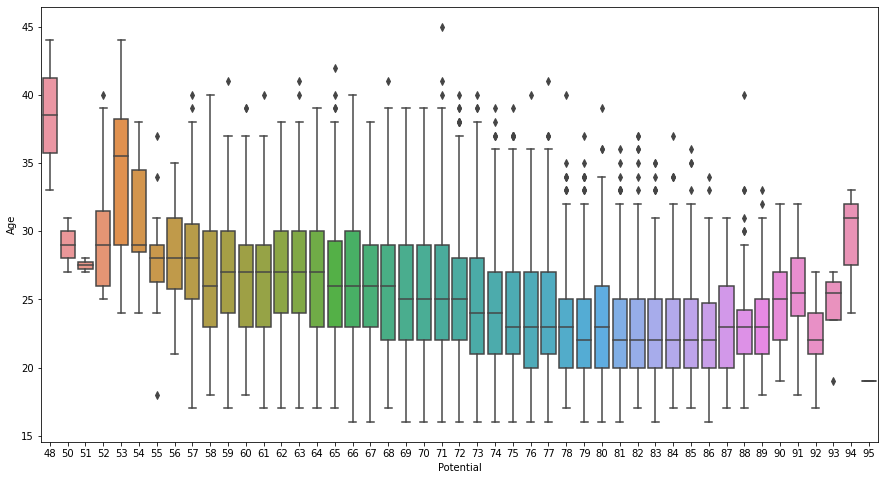

In [401]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Potential',y='Age',data=df)

<Figure size 1080x576 with 0 Axes>

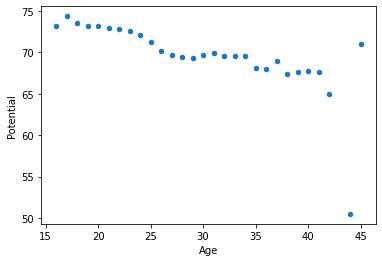

In [398]:
#Check my mean
df6 = df.groupby('Age')['Potential'].mean().reset_index()
df6.sort_values(by='Potential', ascending=False)
#plt.figure(figsize=(15,8))
df6.plot.scatter(x='Age',y='Potential')